# _Exploratory Data Analysis (EDA) on_ <span style="text-decoration: underline;"><b><i>"e-commerce"</i></b></span>

**_Import Library_**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, date

**_Reading a medical appointment csv file using pandas's read_csv datatype._**

In [10]:
trans_dim = pd.read_csv(r'C:\Users\Sony\Downloads\e-commerce advanced analytics (EDA)\Trans_dim.csv')
fact_table = pd.read_csv(r'C:\Users\Sony\Downloads\e-commerce advanced analytics (EDA)\fact_table.csv')
customer_dim  = pd.read_csv(r'C:\Users\Sony\Downloads\e-commerce advanced analytics (EDA)\customer_dim.csv', encoding='latin1')
item_dim = pd.read_csv(r'C:\Users\Sony\Downloads\e-commerce advanced analytics (EDA)\item_dim.csv', encoding='latin1')
store_dim = pd.read_csv(r'C:\Users\Sony\Downloads\e-commerce advanced analytics (EDA)\store_dim.csv')
time_dim = pd.read_csv(r'C:\Users\Sony\Downloads\e-commerce advanced analytics (EDA)\time_dim.csv')

**_Chapter 1: Star Schema Overview_**
- The **Star Schema** is a database design ideal for data warehousing and business intelligence. It features a central **fact table** surrounded by **dimension tables**, resembling a star. This design enhances performance, simplifies queries, and is easy to understand.

In [ ]:
print(trans_dim.info())

In [12]:
customer_dim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9191 entries, 0 to 9190
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   coustomer_key  9191 non-null   object
 1   name           9164 non-null   object
 2   contact_no     9191 non-null   int64 
 3   nid            9191 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 287.3+ KB


In [13]:
fact_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   payment_key    1000000 non-null  object 
 1   coustomer_key  1000000 non-null  object 
 2   time_key       1000000 non-null  object 
 3   item_key       1000000 non-null  object 
 4   store_key      1000000 non-null  object 
 5   quantity       1000000 non-null  int64  
 6   unit           996277 non-null   object 
 7   unit_price     1000000 non-null  float64
 8   total_price    1000000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 68.7+ MB


In [14]:
item_dim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   item_key     264 non-null    object 
 1   item_name    264 non-null    object 
 2   desc         264 non-null    object 
 3   unit_price   264 non-null    float64
 4   man_country  264 non-null    object 
 5   supplier     264 non-null    object 
 6   unit         263 non-null    object 
dtypes: float64(1), object(6)
memory usage: 14.6+ KB


In [15]:
store_dim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_key  726 non-null    object
 1   division   726 non-null    object
 2   district   726 non-null    object
 3   upazila    726 non-null    object
dtypes: object(4)
memory usage: 22.8+ KB


In [16]:
time_dim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   time_key  99999 non-null  object
 1   date      99999 non-null  object
 2   hour      99999 non-null  int64 
 3   day       99999 non-null  int64 
 4   week      99999 non-null  object
 5   month     99999 non-null  int64 
 6   quarter   99999 non-null  object
 7   year      99999 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 6.1+ MB


**_Chapter 2: Exploratory Data Analysis (EDA)_**
- Exploratory Data Analysis (EDA) is a critical step in understanding the underlying patterns, relationships, and anomalies in our data. Through EDA, we aim to summarize the main characteristics, often with visual methods, to uncover trends, patterns, and relationships that are not immediately obvious.

**_We start with the transactions_**

In [17]:
print("Unique transaction types:", trans_dim['trans_type'].nunique())
print(trans_dim['trans_type'].value_counts())
print("Missing bank names:", trans_dim['bank_name'].isnull().sum())
print("Unique banks:", trans_dim['bank_name'].nunique())
print(trans_dim['bank_name'].value_counts())

Unique transaction types: 3
card      35
mobile     3
cash       1
Name: trans_type, dtype: int64
Missing bank names: 0
Unique banks: 39
None                                                  1
Shimanto Bank Ltd                                     1
NRB Global Bank Ltd                                   1
One Bank Limited                                      1
Padma Bank Limited                                    1
Premier Bank Limited                                  1
Prime Bank Limited                                    1
Pubali Bank Limited                                   1
Standard Bank Limited                                 1
Southeast Bank Limited                                1
NRB Bank Limited                                      1
South Bangla Agriculture and Commerce Bank Limited    1
Trust Bank Limited                                    1
United Commercial Bank Ltd                            1
Uttara Bank Limited                                   1
Bengal Commercial Bank 

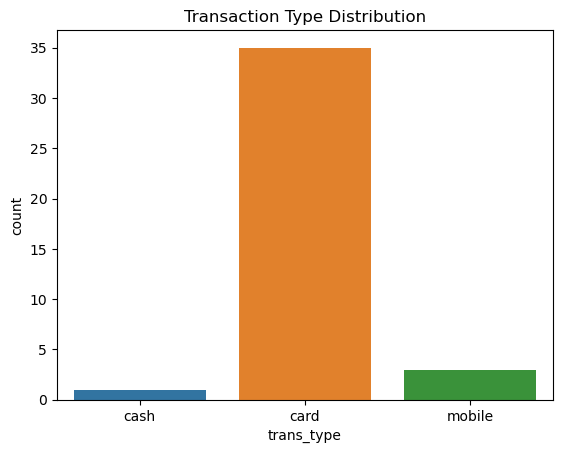

In [18]:
sns.countplot(x='trans_type', data=trans_dim)
plt.title('Transaction Type Distribution')
plt.show()

**_Next for customer_dim_**

In [19]:
print("\nUnique names:", customer_dim['name'].nunique())
print("Missing names:", customer_dim['name'].isnull().sum())
print(customer_dim['name'].value_counts())


Unique names: 4534
Missing names: 27
pooja           185
jyoti           117
neha             87
poonam           81
sunita           80
               ... 
kalpna singh      1
uma yadav         1
geeta saini       1
aazadi@jully      1
madhubala         1
Name: name, Length: 4534, dtype: int64


**_Next for item_dim_**

In [20]:
print("\nUnique item names:", item_dim['item_name'].nunique())
print(item_dim['item_name'].value_counts())

# Summary of 'desc' (descriptions)
print("\nDescriptions available:", item_dim['desc'].nunique())
print("Top descriptions:", item_dim['desc'].value_counts().head())

# Summary statistics for 'unit_price'
print("\nUnit Price Statistics:")
print(item_dim['unit_price'].describe())

# Unique values and value counts for 'man_country' (Manufacturing Country)
print("\nManufacturing Countries:", item_dim['man_country'].nunique())
print(item_dim['man_country'].value_counts())

# Unique values and value counts for 'supplier'
print("\nSuppliers:", item_dim['supplier'].nunique())
print(item_dim['supplier'].value_counts())

# Unique values and value counts for 'unit', including missing values
print("\nUnits (with missing values):", item_dim['unit'].nunique())
print("Missing units:", item_dim['unit'].isnull().sum())
print(item_dim['unit'].value_counts())


Unique item names: 259
Muscle Milk Protein Shake Van. 11oz      2
Coke Classic 12 oz cans                  2
Sprite - 12 oz cans                      2
Diet Coke - 12 oz cans                   2
Pepsi - 12 oz cans                       2
                                        ..
Coffee-mate Original Powdered Creamer    1
French Vanilla International Delight     1
Half & Half -Land o Lakes Mini Moo's     1
Hazelnut International Delight           1
Tylenol Extra Strength 2 pill packets    1
Name: item_name, Length: 259, dtype: int64

Descriptions available: 30
Top descriptions: a. Beverage - Soda             29
Food - Healthy                 29
a. Beverage Sparkling Water    21
Food - Chips                   21
Kitchen Supplies               19
Name: desc, dtype: int64

Unit Price Statistics:
count    264.000000
mean      17.554924
std        8.635017
min        6.000000
25%       13.000000
50%       16.000000
75%       20.000000
max       55.000000
Name: unit_price, dtype: float64

M

**_Histogram for 'unit_price'_**

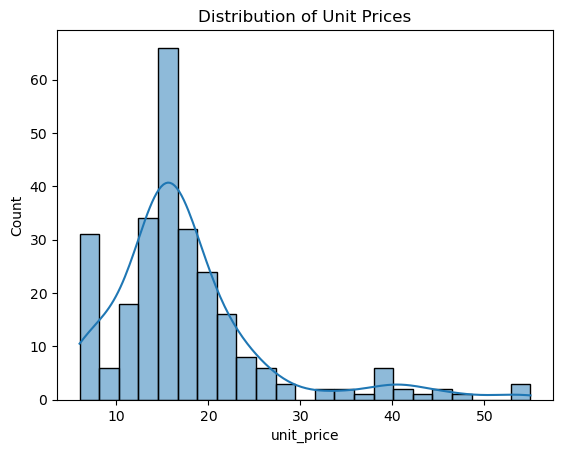

In [21]:
sns.histplot(item_dim['unit_price'], kde=True)
plt.title('Distribution of Unit Prices')
plt.show()

**_Count plot for 'man_country'_**

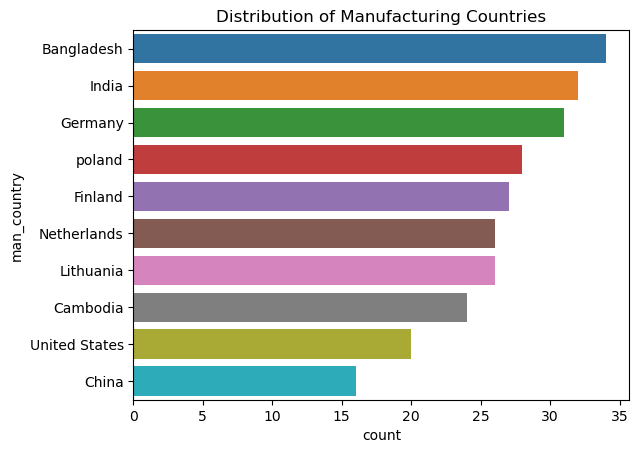

In [22]:
sns.countplot(y='man_country', data=item_dim, order = item_dim['man_country'].value_counts().index)
plt.title('Distribution of Manufacturing Countries')
plt.show()

**_Count plot for top 10 'supplier'_**

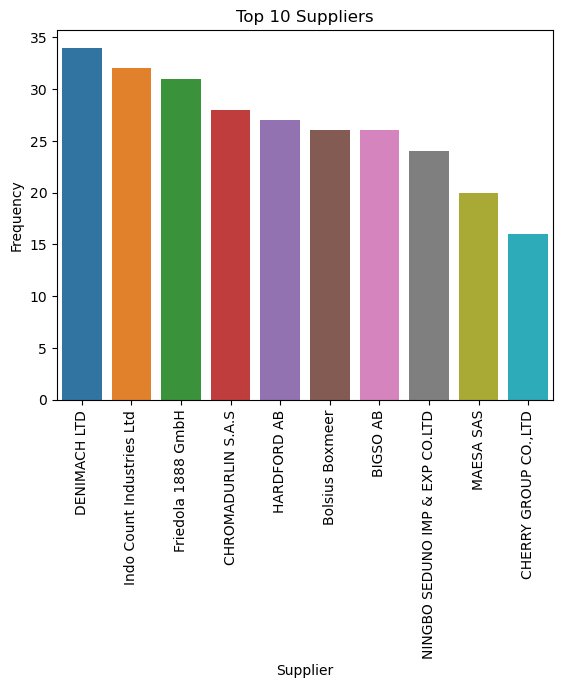

In [23]:
top_suppliers = item_dim['supplier'].value_counts().nlargest(10)
sns.barplot(x=top_suppliers.index, y=top_suppliers)
plt.title('Top 10 Suppliers')
plt.xlabel('Supplier')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

**_Count plot for 'description'_**

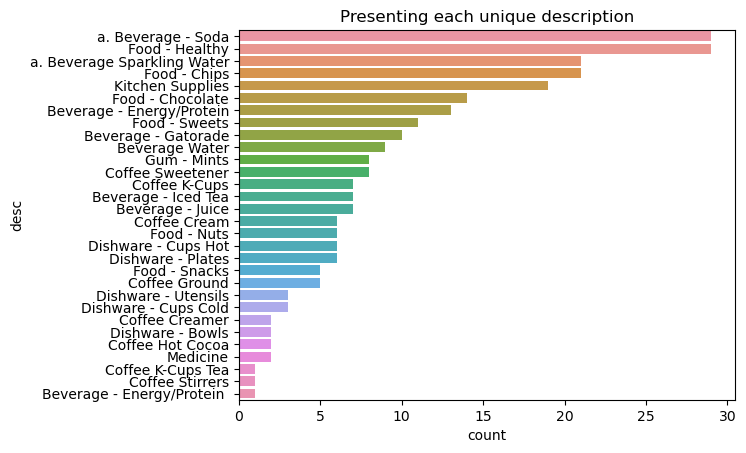

In [24]:
sns.countplot(y='desc', data=item_dim, order = item_dim['desc'].value_counts().index)
plt.title('Presenting each unique description')
plt.show()

**_next, we do the same for store_dim_**

**_Unique values and value counts for 'division'_**

In [25]:
print("\nDivisions:", store_dim['division'].nunique())
print(store_dim['division'].value_counts())

# Unique values and value counts for 'district'
print("\nDistricts:", store_dim['district'].nunique())
print(store_dim['district'].value_counts())

# Unique values and value counts for 'upazila'
print("\nUpazilas:", store_dim['upazila'].nunique())
print(store_dim['upazila'].value_counts())


Divisions: 7
DHAKA         280
CHITTAGONG    136
RAJSHAHI       84
KHULNA         78
RANGPUR        58
BARISAL        52
SYLHET         38
Name: division, dtype: int64

Districts: 64
DHAKA         162
CHITTAGONG     50
KHULNA         28
RAJSHAHI       26
BARISAL        20
             ... 
MADARIPUR       4
MAGURA          4
JHALOKATI       4
MEHERPUR        3
NARAIL          3
Name: district, Length: 64, dtype: int64

Upazilas: 540
KOTWALI            5
DAULATPUR          4
MIRPUR             4
MOHAMMADPUR        4
NAWABGANJ          4
                  ..
BAGERHAT SADAR     1
ULLAH PARA         1
TARASH             1
SIRAJGANJ SADAR    1
ZIANAGAR           1
Name: upazila, Length: 540, dtype: int64


**_Count plot for 'division'_**

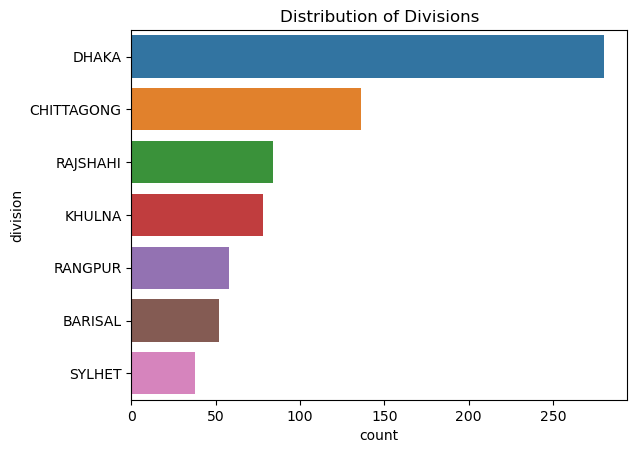

In [26]:
sns.countplot(y='division', data=store_dim, order=store_dim['division'].value_counts().index)
plt.title('Distribution of Divisions')
plt.show()

**_Count plot for top 10 'district'_**

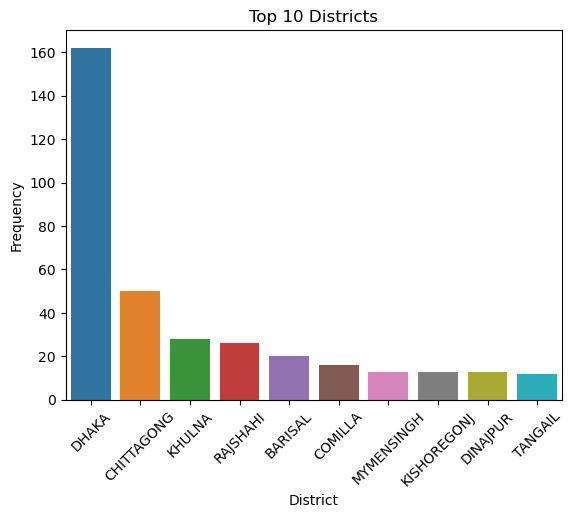

In [27]:
top_districts = store_dim['district'].value_counts().nlargest(10)
sns.barplot(x=top_districts.index, y=top_districts)
plt.title('Top 10 Districts')
plt.xlabel('District')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

**_Finally, for time_dim_**

**_Summary statistics for 'year'_**

In [28]:
print("\nYear Statistics:")
print(time_dim['year'].value_counts())


Year Statistics:
2017    14357
2018    14315
2015    14294
2019    14240
2016    14239
2020    14160
2014    13560
2021      834
Name: year, dtype: int64


**_Creating a bar plot for the distribution of years directly from the DataFrame_**

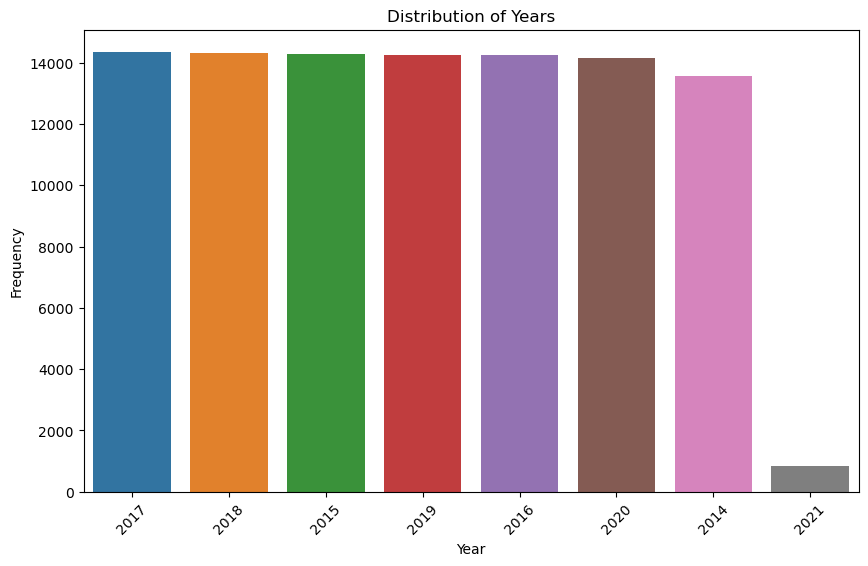

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x='year', data=time_dim, order = time_dim['year'].value_counts().index)
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate the x labels for better readability if necessary
plt.show()

**_Histogram for 'total_price'_**

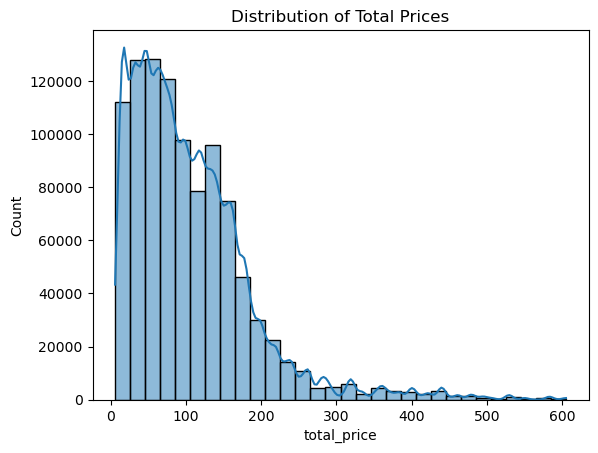

In [30]:
sns.histplot(fact_table['total_price'], kde=True, bins=30)
plt.title('Distribution of Total Prices')
plt.show()

**_Merging the fact_table with the time_dim on 'time_key'_**

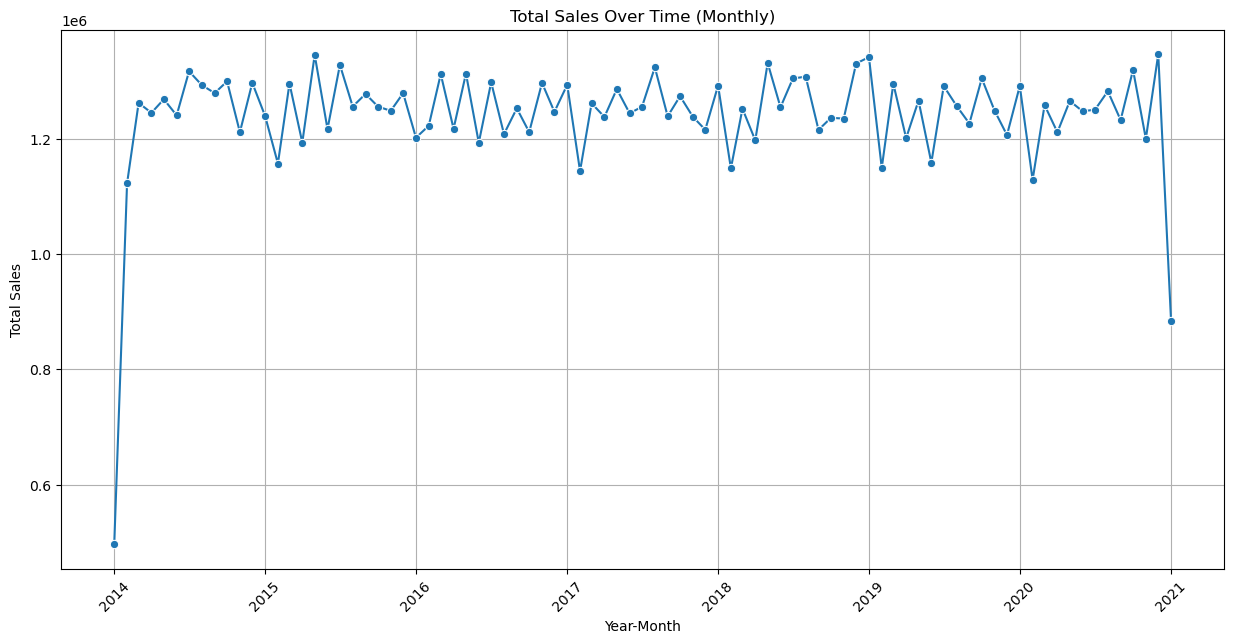

In [31]:
merged_data = pd.merge(fact_table, time_dim, on='time_key', how='inner')

monthly_sales = merged_data.groupby(['year', 'month'])['total_price'].sum().reset_index()

monthly_sales['year_month'] = pd.to_datetime(monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str))

plt.figure(figsize=(15,7))
sns.lineplot(x='year_month', y='total_price', data=monthly_sales, marker='o')
plt.title('Total Sales Over Time (Monthly)')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.grid(True)
plt.show()

                                 item_name  total_price
206                          Red Bull 12oz    1305700.0
119    K Cups Daily Chef Columbian Supremo    1245394.0
123  K Cups Original Donut Shop Med. Roast    1188843.0
120      K Cups Dunkin Donuts Medium Roast    1109760.0
161    Muscle Milk Protein Shake Van. 11oz    1050924.0
121        K Cups Folgers Lively Columbian    1042406.0
114                        Honey Packets      1012995.0
124         K Cups  Starbuck's Pike Place     995456.0
125        K Cups Organic Breakfast Blend     957516.0
118          K Cups - McCafe Premium Roast     956886.0


C:\Users\Sony\AppData\Local\Temp\ipykernel_1792\1331868322.py:20: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.tight_layout()
C:\Users\Sony\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


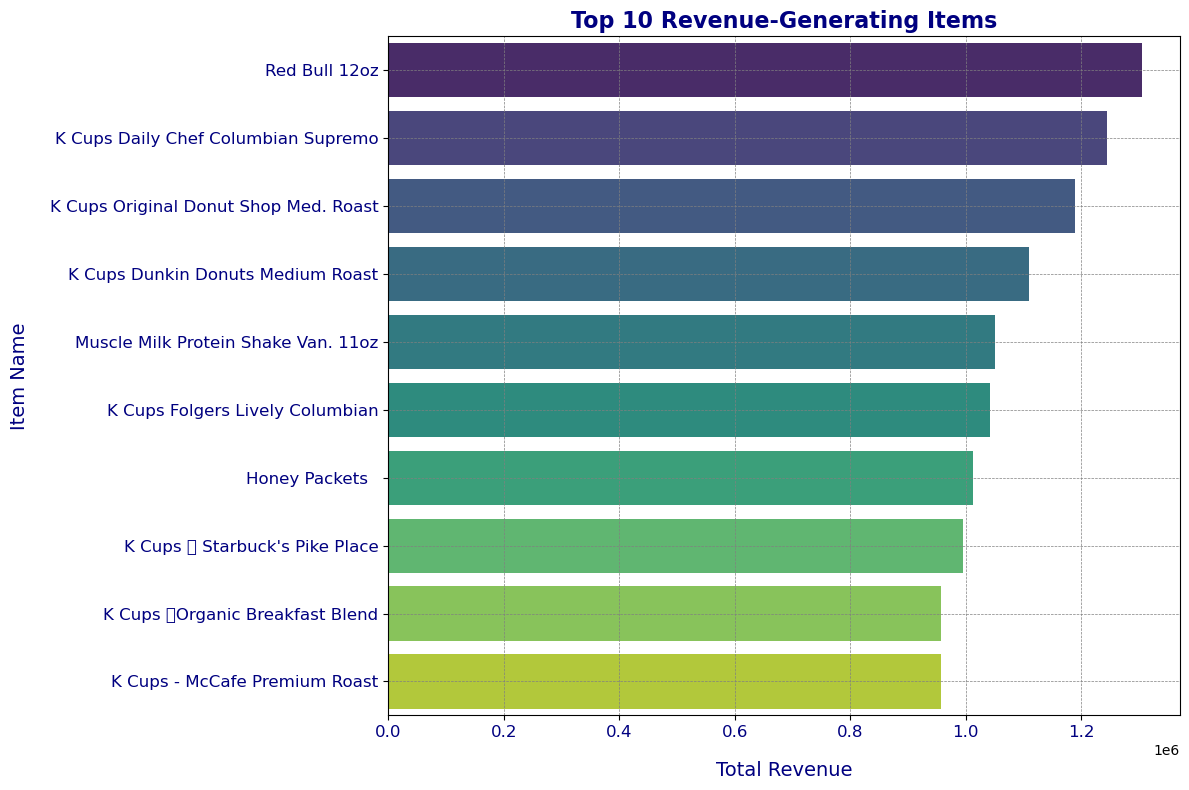

In [32]:
merged_data = pd.merge(fact_table, item_dim, on='item_key', how='inner')

item_sales = merged_data.groupby('item_name')['total_price'].sum().reset_index()

top_items_by_sales = item_sales.sort_values(by='total_price', ascending=False)

print(top_items_by_sales.head(10))

top_items_by_sales = item_sales.sort_values(by='total_price', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='total_price', y='item_name', data=top_items_by_sales, palette='viridis')

plt.title('Top 10 Revenue-Generating Items', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Total Revenue', fontsize=14, labelpad=15, color='navy')
plt.ylabel('Item Name', fontsize=14, labelpad=15, color='navy')
plt.xticks(fontsize=12, color='navy')
plt.yticks(fontsize=12, color='navy')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()  
plt.show()

                           desc  total_price
21               Food - Healthy  10379038.00
0     Beverage - Energy/Protein  10238348.00
26             Kitchen Supplies   8434526.50
19                 Food - Chips   7757407.00
10                Coffee K-Cups   7496261.00
29  a. Beverage Sparkling Water   7462502.00
20             Food - Chocolate   6689505.00
28           a. Beverage - Soda   6497431.75
2           Beverage - Gatorade   4078008.50
13             Coffee Sweetener   3676606.00


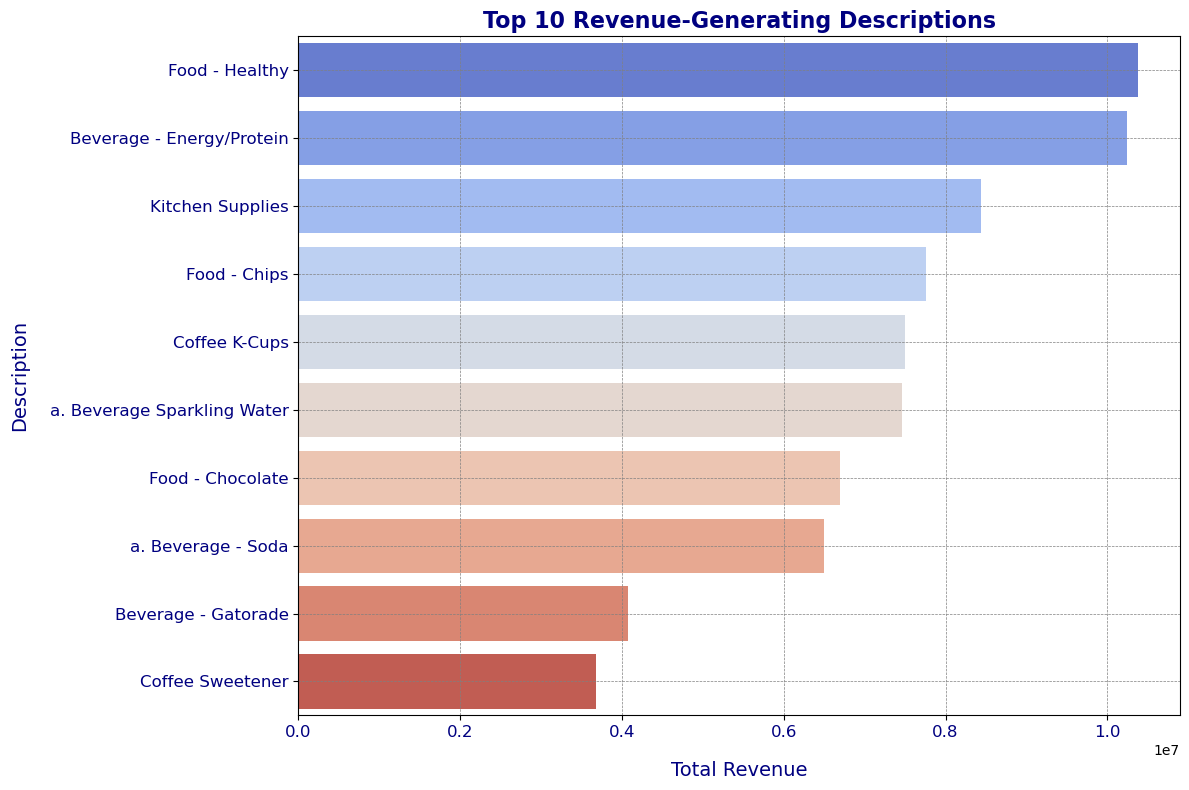

In [33]:
desc_sales = merged_data.groupby('desc')['total_price'].sum().reset_index()

top_desc_sales = desc_sales.sort_values(by='total_price', ascending=False).head(10)

print(top_desc_sales.head(10))

plt.figure(figsize=(12, 8))
sns.barplot(x='total_price', y='desc', data=top_desc_sales, palette='coolwarm')

plt.title('Top 10 Revenue-Generating Descriptions', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Total Revenue', fontsize=14, labelpad=15, color='navy')
plt.ylabel('Description', fontsize=14, labelpad=15, color='navy')
plt.xticks(fontsize=12, color='navy')
plt.yticks(fontsize=12, color='navy')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()  
plt.show()

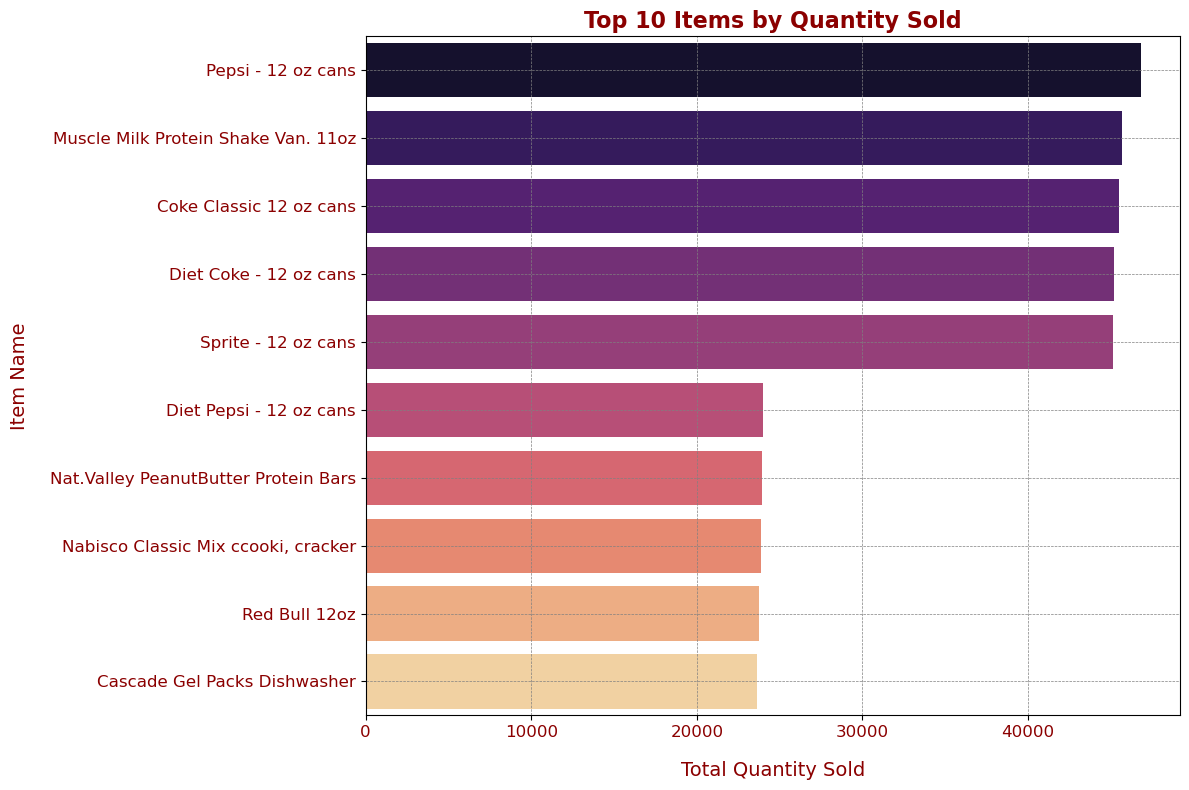

In [34]:
merged_data = pd.merge(fact_table, item_dim, on='item_key', how='inner')


item_sales_quantity = merged_data.groupby('item_name')['quantity'].sum().reset_index()
item_sales_quantity =  item_sales_quantity.sort_values(by='quantity', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='quantity', y='item_name', data=item_sales_quantity, palette='magma')

plt.title('Top 10 Items by Quantity Sold', fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Total Quantity Sold', fontsize=14, labelpad=15, color='darkred')
plt.ylabel('Item Name', fontsize=14, labelpad=15, color='darkred')
plt.xticks(fontsize=12, color='darkred')
plt.yticks(fontsize=12, color='darkred')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout() 
plt.show()

     division  total_price
2       DHAKA  40764619.75
1  CHITTAGONG  19763595.00
4    RAJSHAHI  12099196.00
3      KHULNA  11311610.50
5     RANGPUR   8429836.50
0     BARISAL   7520343.75
6      SYLHET   5512234.25


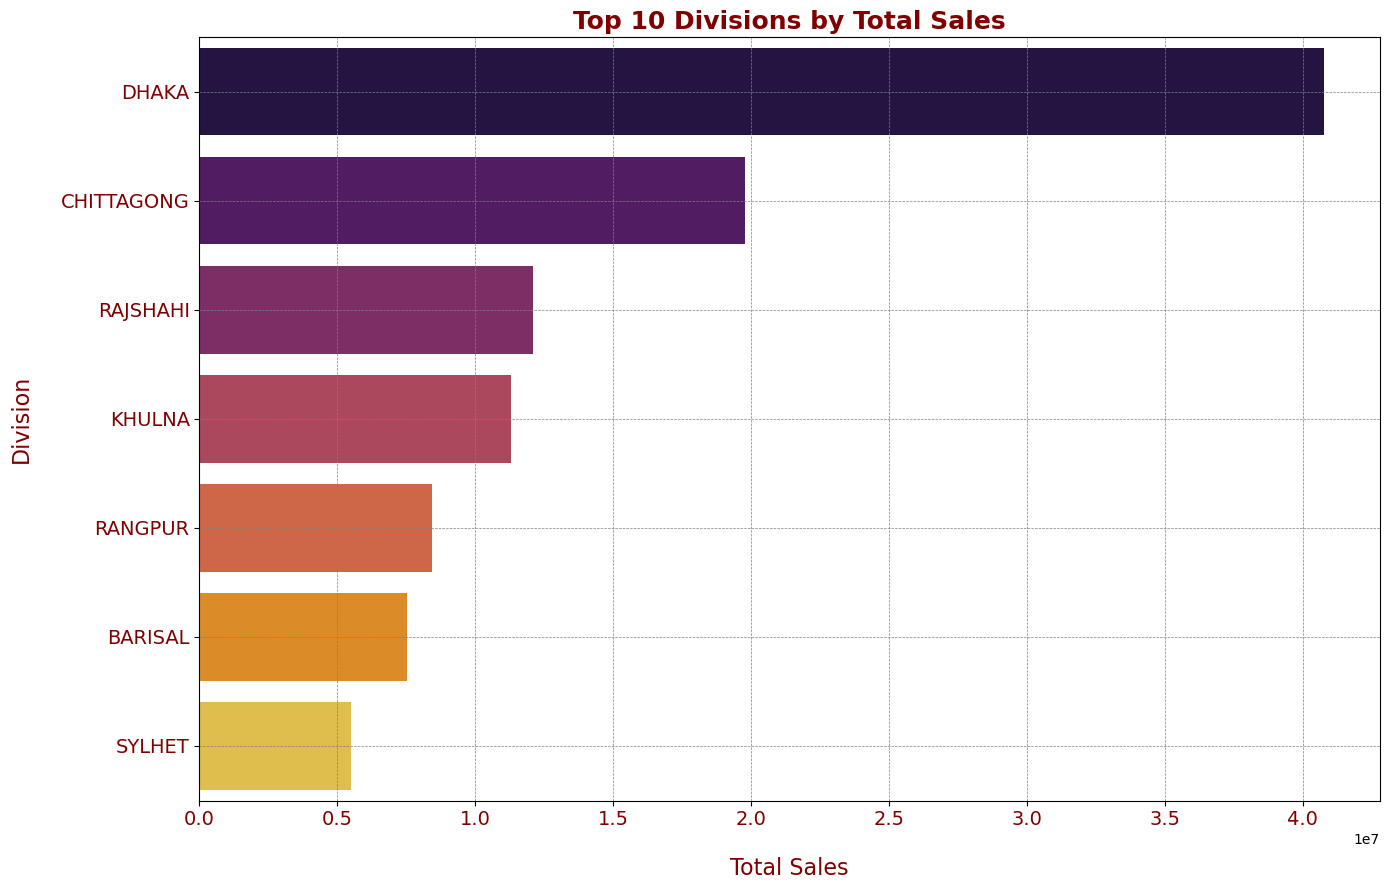

In [35]:
merged_data = pd.merge(fact_table, store_dim, on='store_key', how='inner')


division_sales = merged_data.groupby('division')['total_price'].sum().reset_index()

top_divisions_by_sales = division_sales.sort_values(by='total_price', ascending=False).head(10)

print(top_divisions_by_sales)

plt.figure(figsize=(14, 9))
sns.barplot(x='total_price', y='division', data=top_divisions_by_sales, palette='inferno')

# Enhance the plot's aesthetics
plt.title('Top 10 Divisions by Total Sales', fontsize=18, fontweight='bold', color='maroon')
plt.xlabel('Total Sales', fontsize=16, labelpad=20, color='maroon')
plt.ylabel('Division', fontsize=16, labelpad=20, color='maroon')
plt.xticks(fontsize=14, color='maroon')
plt.yticks(fontsize=14, color='maroon')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()  
plt.show()

        division                              item_name  total_price
206      BARISAL                          Red Bull 12oz      95205.0
123      BARISAL  K Cups Original Donut Shop Med. Roast      86231.0
119      BARISAL    K Cups Daily Chef Columbian Supremo      83952.0
120      BARISAL      K Cups Dunkin Donuts Medium Roast      83376.0
121      BARISAL        K Cups Folgers Lively Columbian      76590.0
465   CHITTAGONG                          Red Bull 12oz     246510.0
378   CHITTAGONG    K Cups Daily Chef Columbian Supremo     235479.0
382   CHITTAGONG  K Cups Original Donut Shop Med. Roast     227370.0
420   CHITTAGONG    Muscle Milk Protein Shake Van. 11oz     202870.0
379   CHITTAGONG      K Cups Dunkin Donuts Medium Roast     201696.0
724        DHAKA                          Red Bull 12oz     510895.0
637        DHAKA    K Cups Daily Chef Columbian Supremo     474403.0
641        DHAKA  K Cups Original Donut Shop Med. Roast     470958.0
638        DHAKA      K Cups Dunki

C:\Users\Sony\AppData\Local\Temp\ipykernel_1792\662701916.py:30: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.tight_layout()
C:\Users\Sony\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


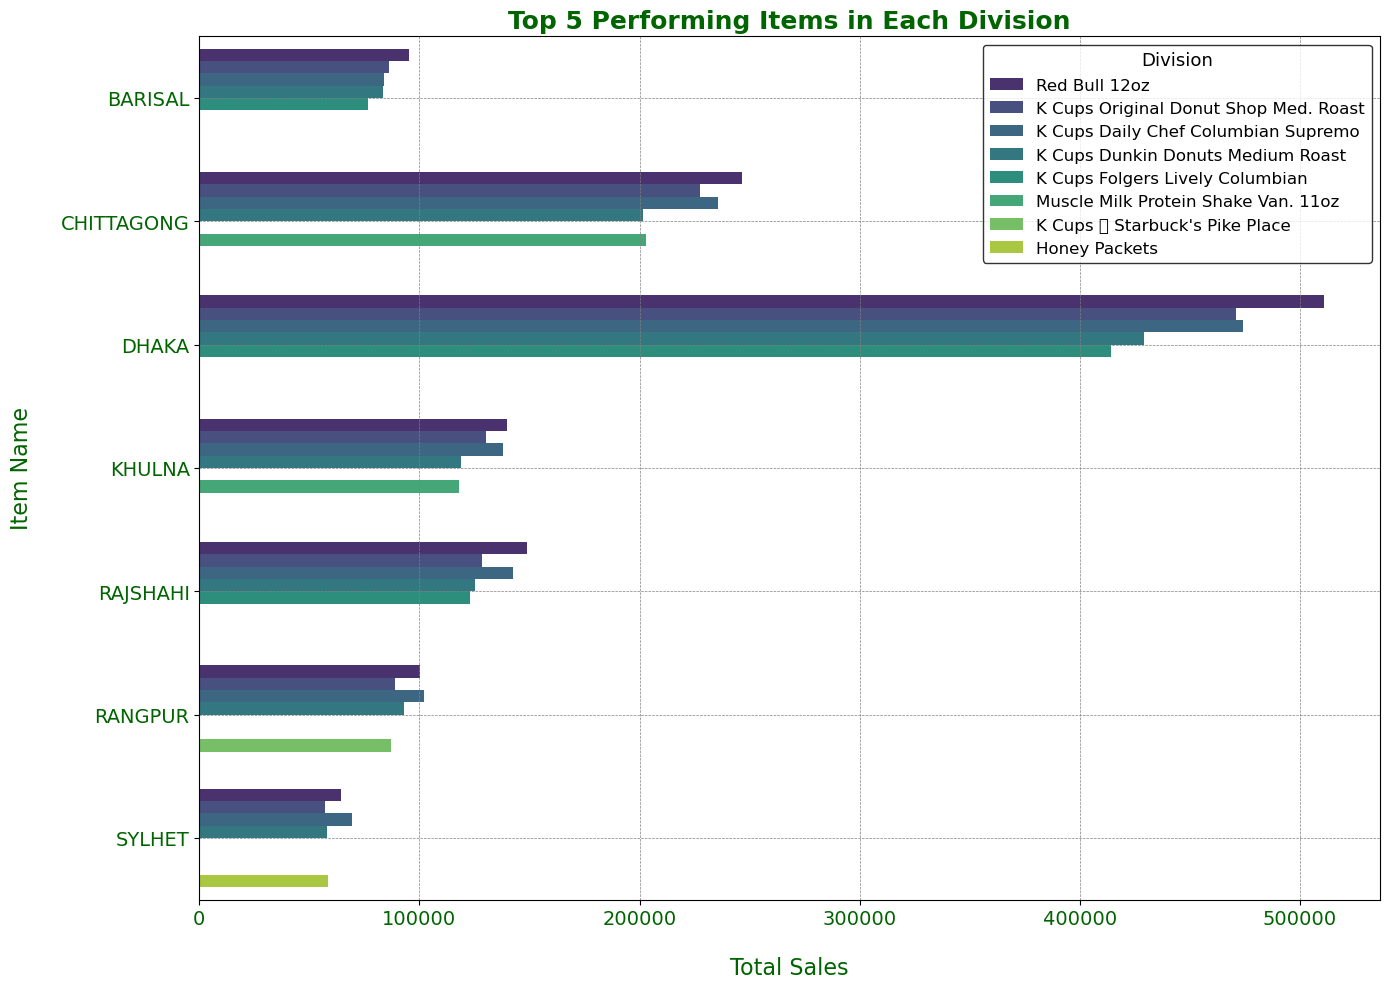

In [36]:
merged_data = pd.merge(fact_table, item_dim, on='item_key', how='inner')
merged_data = pd.merge(merged_data, store_dim, on='store_key', how='inner')


division_item_sales = merged_data.groupby(['division', 'item_name'])['total_price'].sum().reset_index()

# Sorting the items within each division by total sales in descending order
division_item_sales.sort_values(by=['division', 'total_price'], ascending=[True, False], inplace=True)

# Identifying the top 5 performing items in each division
top_5_items_in_division = division_item_sales.groupby('division').head(5)

# Displaying the top 5 performing items in each division
print(top_5_items_in_division)

# Creating a bar plot for top 5 items in each division with enhanced aesthetics
plt.figure(figsize=(14, 10))
sns.barplot(x='total_price', y='division', hue='item_name', data=top_5_items_in_division, palette='viridis')


plt.title('Top 5 Performing Items in Each Division', fontsize=18, fontweight='bold', color='darkgreen')
plt.xlabel('Total Sales', fontsize=16, labelpad=20, color='darkgreen')
plt.ylabel('Item Name', fontsize=16, labelpad=20, color='darkgreen')
plt.xticks(fontsize=14, color='darkgreen')
plt.yticks(fontsize=14, color='darkgreen')
plt.legend(title='Division', title_fontsize='13', fontsize='12', facecolor='white', edgecolor='black')

plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()  
plt.show()

C:\Users\Sony\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 150 (\x96) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Sony\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


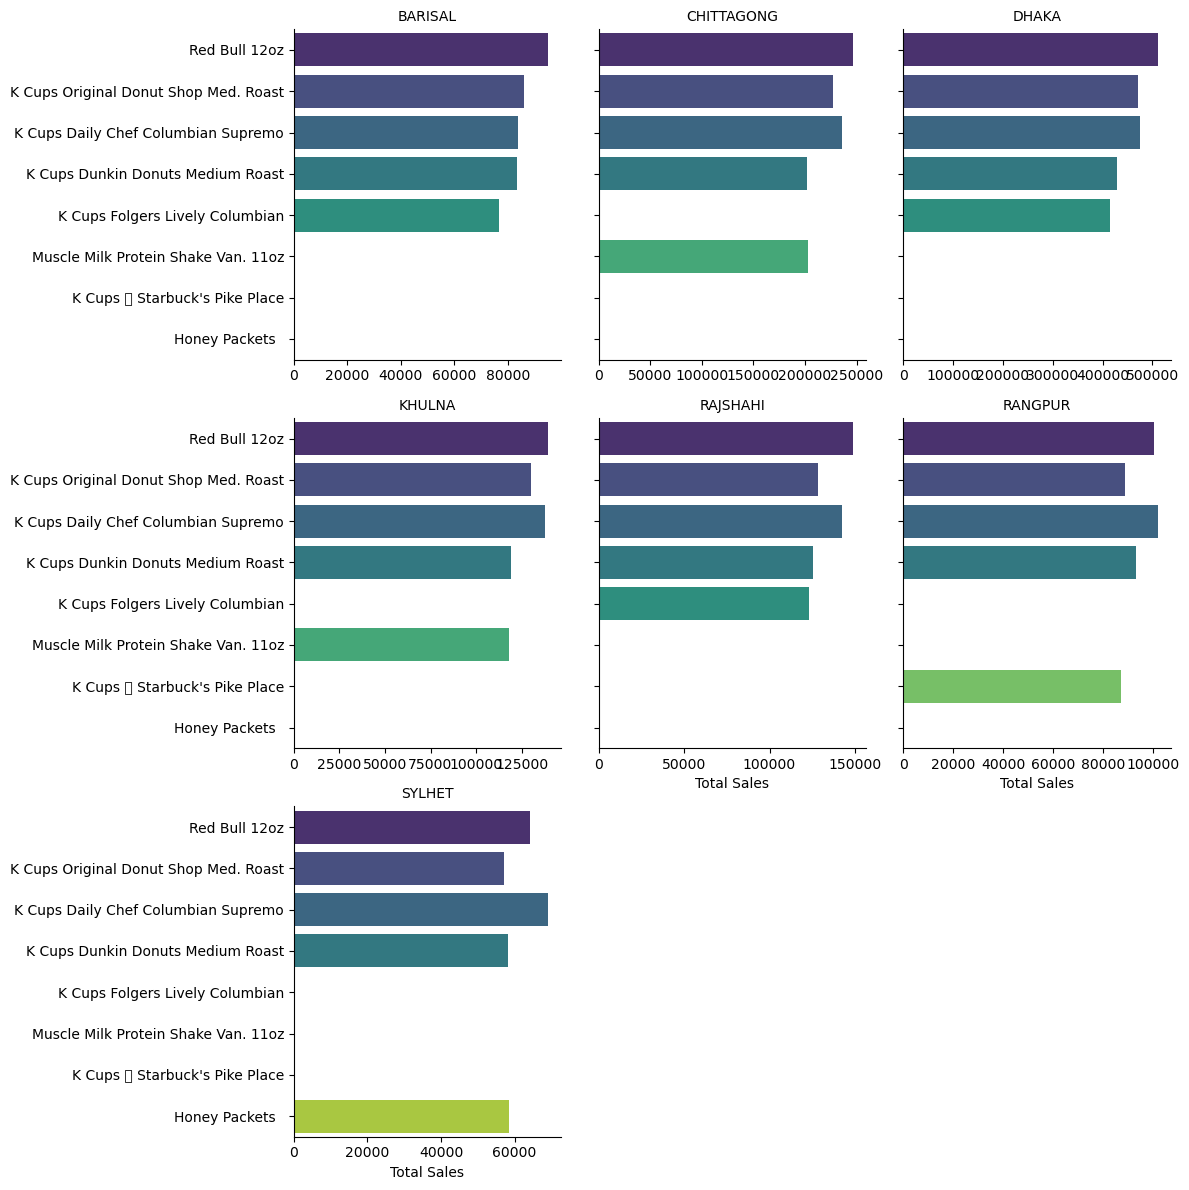

In [37]:
g = sns.FacetGrid(top_5_items_in_division, col='division', col_wrap=3, height=4, sharex=False)
g.map(sns.barplot, 'total_price', 'item_name', order=top_5_items_in_division['item_name'].unique(), palette='viridis')

g.set_titles('{col_name}')
g.set_axis_labels('Total Sales', 'Item Name')
g.set(ylabel='')

plt.tight_layout()

plt.show()